In [39]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import END,START,StateGraph
from langgraph.prebuilt import tools_condition,ToolNode
from langchain_core.tools import tool
from langchain_community.tools import DuckDuckGoSearchRun
from dotenv import load_dotenv
from typing import Optional,Annotated ,Literal
from  langgraph.graph.message  import add_messages
from langchain_core.messages import BaseMessage,AIMessage,HumanMessage,ToolMessage
from pydantic import BaseModel,Field




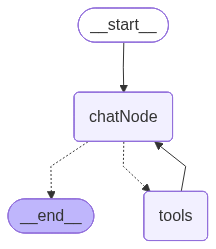

In [40]:
search_tool= DuckDuckGoSearchRun()

@tool
def multiplication(a: float, b: float, operation: Literal["multiplication", "addition"]) -> float:
    """A calculator that can perform addition and multiplication."""
    if operation == "multiplication":
        return a * b
    elif operation == "addition":
        return a + b
    else:
        raise ValueError("No such operation exists")
   



llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash")
tools=[multiplication,search_tool]
llm_with_tool = llm.bind_tools(tools)

class Chatstate(BaseModel):
    messages:Annotated[list[BaseMessage],add_messages]=Field(description="all the message history")
graph= StateGraph(Chatstate)

def chatNode(state:Chatstate):
    message=state.messages
    res=llm_with_tool.invoke(message)
    return {"messages":[res]}


graph.add_node("chatNode",chatNode)
graph.add_node("tools",ToolNode(tools))
graph.add_edge("tools","chatNode")

graph.add_edge(START,"chatNode")

graph.add_conditional_edges("chatNode",tools_condition)

chat=graph.compile()
chat







In [41]:
res=chat.invoke({"messages":[HumanMessage("hii who are you")]})
print(res)

{'messages': [HumanMessage(content='hii who are you', additional_kwargs={}, response_metadata={}, id='d2bd980c-949a-4a91-af98-e54399a83098'), AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--f813a31d-ef1e-4edc-9c7a-f01a2cbf42f5-0', usage_metadata={'input_tokens': 137, 'output_tokens': 11, 'total_tokens': 148, 'input_token_details': {'cache_read': 0}})]}


In [43]:
res=chat.invoke({"messages":[HumanMessage(" current cricket matches going today use search_tool  ")]})
print(res["messages"])

[HumanMessage(content=' current cricket matches going today use search_tool  ', additional_kwargs={}, response_metadata={}, id='c243bdc8-3438-46bc-be6a-2bc7f796cef8'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'duckduckgo_search', 'arguments': '{"query": "current cricket matches today"}'}, '__gemini_function_call_thought_signatures__': {'ebd5dbe8-1620-4f48-b992-e2d4a76f6801': 'CqICAXLI2nzB+9Fg3bjU+KmO+XnJ4LEK9GLS8aKi44nPBDzqGOrxxgh4gi57rri34GpHxOjgZALU90gnSiC1pkDKcbad9W2gQdZgoI4JHPhrq2Xo40V6CZxFkSS3RMLwPRsgB2Md13xfEv25rh4YjTh4eCnrwVINQnitGBTkYR3og2qdcHDGECgdYgWcA1FIFX84DSEMuFUimLk7pfdtmzYtV3jDIyWAKRg/uVsQ6tVCioQSGimKxlrKiZTTeLHqdThiizkm+G5JsjFEt5ph4NEBJnDVBjYFL6z/Iw6D7Tzw0Man1Nkdvtz06gKZtP0YhcXFZfQVRyikrVr3jPFZYesveMseHPgaqJaWTynkshyXWTi8af2879FHoQ29Q36z3nYHWUs='}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, i